In [236]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [237]:
df = pd.read_csv('experiments.csv')

In [238]:
df['Train-entropy'] = df['Train-entropy'] / 8 / 2
df['Val-entropy'] = df['Val-entropy'] / 8 / 2

In [239]:
df.head()

,type,topn,rotations,Labelled-data-count,Labelled-data,Train-affordance,Train-entropy,Train-expected-distance-0.1-max,Train-expected-distance-0.2-max,Train-expected-distance,...,Train-top-5,Val-affordance,Val-entropy,Val-expected-distance-0.1-max,Val-expected-distance-0.2-max,Val-expected-distance,Val-loss,Val-ranking,Val-success-rate,Val-top-5-success-rate
0,teacher,1,8,20,0.01,0.001699,3.686250,0.03450,0.05382,0.1951,...,0.9462,0.000633,3.731875,0.04589,0.08209,0.2663,7.987,0.08900,0.5556,0.8774
1,teacher,1,8,40,0.02,0.001999,3.764375,0.03551,0.05497,0.1948,...,0.9656,0.000704,3.860625,0.04291,0.07702,0.2606,7.265,0.05261,0.6204,0.9143
2,teacher,1,8,100,0.05,0.002103,3.476250,0.03446,0.05377,0.1745,...,0.9413,0.000941,3.533750,0.04142,0.06901,0.2356,7.111,0.03718,0.6333,0.9205
3,teacher,1,8,200,0.10,0.001756,3.681250,0.03639,0.05762,0.2045,...,0.9545,0.000987,3.706875,0.04064,0.06610,0.2373,6.719,0.03382,0.6747,0.9372
4,teacher,1,8,400,0.20,0.001575,3.696875,0.03657,0.05897,0.2062,...,0.9547,0.001053,3.709375,0.04021,0.06552,0.2251,6.550,0.03324,0.7020,0.9479


In [240]:
teacher_scaling = df[df.type == 'teacher']
student_scaling = df[df.type == 'student']
student_topn_ablation = df[df.type == 'student-topn-ablation']
student_angle_ablation = df[df.type == 'student-angle-ablation']

In [241]:
def compare_(x, y, xlabel, ylabel, xlog=False, ylog=False, label=None, marker=None):
    plt.plot(x, y, label=label, marker=marker)
    plt.xlabel(xlabel)
    # plt.ylim([0., 1.])
    if xlog:
        plt.xscale('log')
    if ylog:
        plt.yscale('log')
    plt.ylabel(ylabel)
    plt.grid('on')
    
def compare(df, x, y, xlabel, ylabel, xlog=False, ylog=False, label=None, marker=None):
    compare_(df.loc[:, x].to_numpy(), df.loc[:, y].to_numpy(), xlabel, ylabel, xlog, ylog, label, marker)

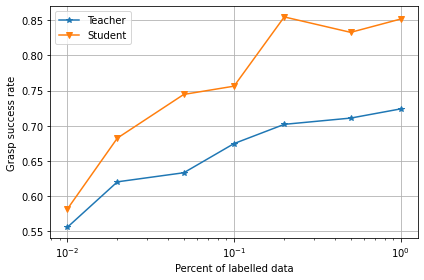

In [242]:
compare(teacher_scaling, 'Labelled-data', 'Val-success-rate', 'Percent of labelled data', 'Grasp success rate', label='Teacher', xlog=True, marker='*')
compare(student_scaling, 'Labelled-data', 'Val-success-rate', 'Percent of labelled data', 'Grasp success rate', label='Student', xlog=True, marker='v')
plt.legend()
plt.tight_layout()
plt.savefig('teacher-student.pdf')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


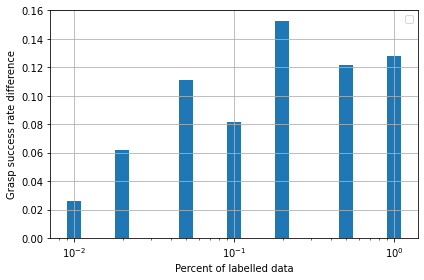

In [243]:
x = teacher_scaling.loc[:, 'Labelled-data'].to_numpy()
y = student_scaling.loc[:, 'Val-success-rate'] - teacher_scaling.loc[:, 'Val-success-rate'].to_numpy()
plt.bar(x, y, width=np.array([0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.])/5)
plt.xlabel('Percent of labelled data')
plt.xscale('log')
plt.ylabel('Grasp success rate difference')
plt.grid('on')
plt.legend()
plt.tight_layout()
plt.savefig('teacher-student-difference.pdf')

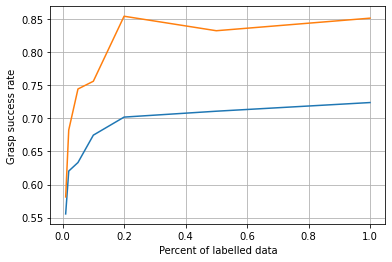

In [244]:
compare(teacher_scaling, 'Labelled-data', 'Val-success-rate', 'Percent of labelled data', 'Grasp success rate')
compare(student_scaling, 'Labelled-data', 'Val-success-rate', 'Percent of labelled data', 'Grasp success rate')

In [245]:
# compare(teacher_scaling, 'Labelled-data', 'Val-entropy', 'Percent of labelled data', 'Grasp success rate')
# compare(student_scaling, 'Labelled-data', 'Val-entropy', 'Percent of labelled data', 'Grasp success rate')

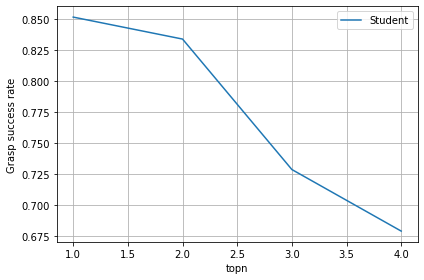

In [246]:
compare(student_topn_ablation, 'topn', 'Val-success-rate', 'topn', 'Grasp success rate', label='Student')
plt.legend()
plt.tight_layout()
plt.savefig('student-topn.pdf')

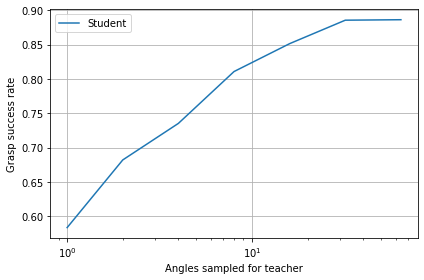

In [247]:
compare(student_angle_ablation, 'rotations', 'Val-success-rate', 'Angles sampled for teacher', 'Grasp success rate', xlog=True, label='Student')
plt.legend()
plt.tight_layout()
plt.savefig('student-angle-resolution.pdf')

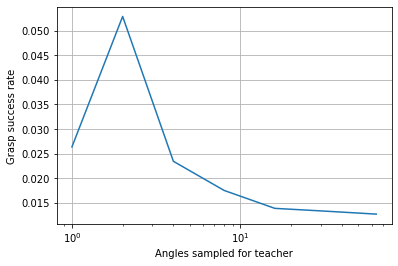

In [248]:
compare(student_angle_ablation, 'rotations', 'Train-entropy', 'Angles sampled for teacher', 'Grasp success rate', xlog=True, label='student')


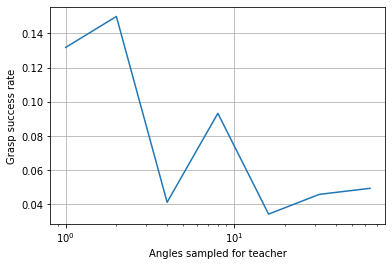

In [249]:
compare(student_angle_ablation, 'rotations', 'Val-entropy', 'Angles sampled for teacher', 'Grasp success rate', xlog=True)

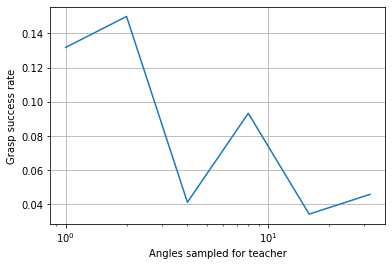

In [235]:
compare(student_angle_ablation, 'rotations', 'Val-entropy', 'Angles sampled for teacher', 'Grasp success rate', xlog=True)